In [1]:
!pip install kaggle

In [14]:
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

In [12]:
import os

In [13]:
os.environ['KAGGLE_USERNAME'] = 'liudmilashegal'
os.environ['KAGGLE_KEY'] = '/kaggle.json'

In [15]:
api = KaggleApi()
api.authenticate()

In [16]:
import kaggle

In [19]:
kaggle.api.dataset_download_files('unsdsn/world-happiness', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness


In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('/content/2019.csv')

In [22]:
df.shape

(156, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [93]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [24]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [25]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [26]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
columns_to_normalize = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [29]:
scaler = MinMaxScaler()

In [34]:
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [35]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,7.600,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,7.554,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,7.494,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,7.488,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


In [36]:
import matplotlib.pyplot as plt

In [39]:
import numpy as np

In [37]:
x = df['Social support']
y = df['Score']

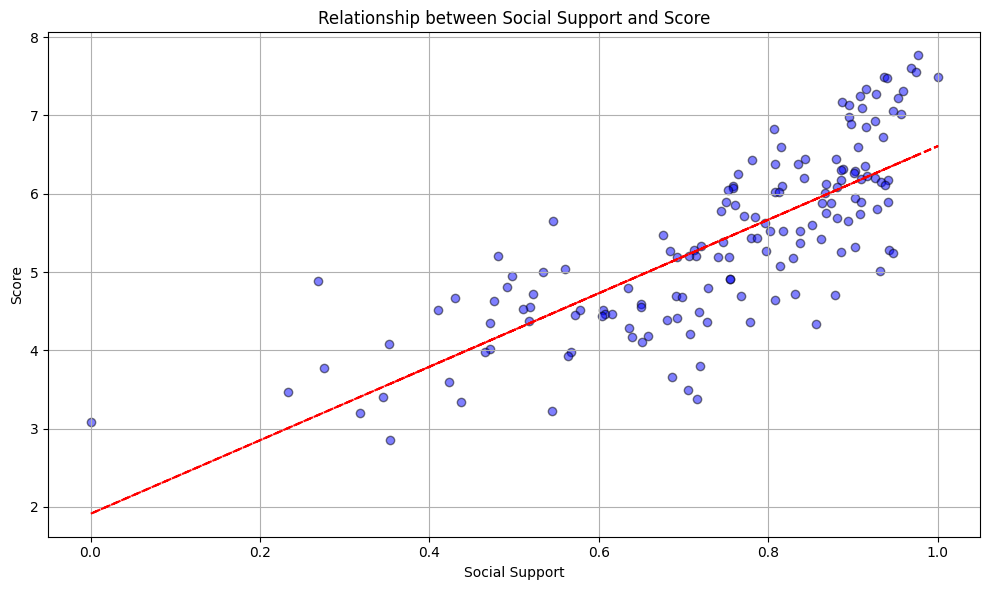

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='blue', edgecolor='black')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.title('Relationship between Social Support and Score')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see the positive correlation between Social support and score.

In [44]:
grouped = df.groupby('Country or region')

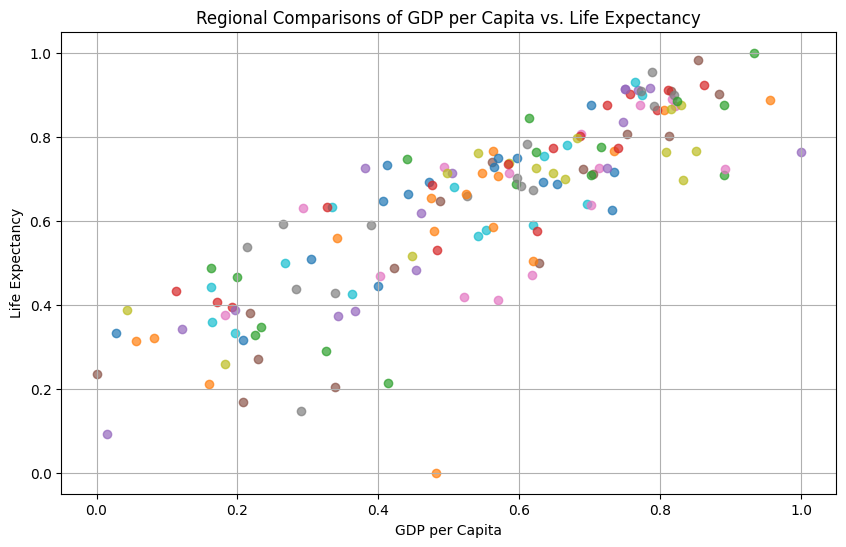

In [60]:
plt.figure(figsize=(10, 6))

for country, data in grouped:
    a = data['GDP per capita']
    b = data['Healthy life expectancy']
    plt.scatter(a, b, label=country, alpha=0.7)

plt.title('Regional Comparisons of GDP per Capita vs. Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

In [73]:
value_to_check = 'Europe'
if df['Country or region'].isin([value_to_check]).any():
    print(f"'{value_to_check}' exists in the 'Name' column.")
else:
    print(f"'{value_to_check}' does not exist in the 'Name' column.")

'Europe' does not exist in the 'Name' column.


In [75]:
!pip install pycountry_convert

  Using cached pycountry_convert-0.7.2-py3-none-any.whl (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 2.4 MB/s eta 0:00:00


In [76]:
import pycountry_convert as pc

In [82]:
def country_to_continent(country_name):
    country_name = country_name.replace('&', 'and')

    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except KeyError:
        return "Unknown"

In [83]:
region_mappings = {}

In [89]:
for country_name in df['Country or region']:
    region = country_to_continent(country_name)
    region_mappings[country_name] = region

In [90]:
df['Region'] = df['Country or region'].map(region_mappings)

In [91]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550,Europe
1,2,Denmark,7.600,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077,Europe
2,3,Norway,7.554,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759,Europe
3,4,Iceland,7.494,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486,Europe
4,5,Netherlands,7.488,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837,Europe


In [94]:
grouped = df.groupby('Region')[numeric_cols].mean().reset_index()

In [97]:
grouped.head()

,Region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Africa,122.604651,4.356814,0.299177,0.573190,0.390029,0.522648,0.310995,0.210380
1,Asia,83.222222,5.278400,0.586382,0.737206,0.674827,0.649903,0.378013,0.249792
2,Europe,44.025641,6.278513,0.729551,0.885263,0.809771,0.642529,0.303207,0.295862
3,North America,44.538462,6.154692,0.565549,0.818681,0.715769,0.725832,0.330253,0.215317
4,Oceania,9.500000,7.267500,0.794240,0.955973,0.903593,0.904913,0.584806,0.739514


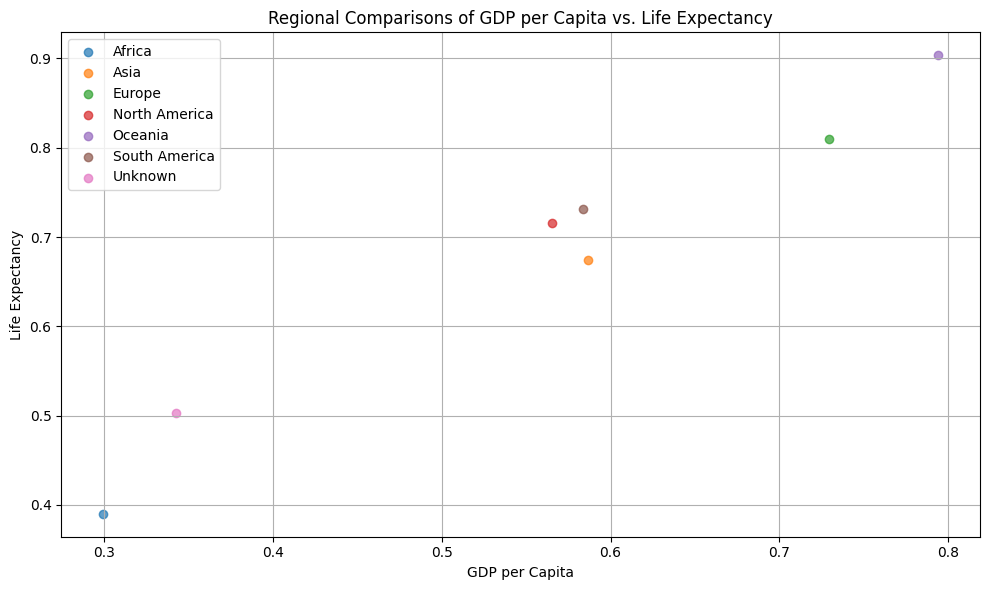

In [100]:
plt.figure(figsize=(10, 6))

for index, row in grouped.iterrows():
    region = row['Region']
    plt.scatter(row['GDP per capita'], row['Healthy life expectancy'], label=region, alpha=0.7)

plt.title('Regional Comparisons of GDP per Capita vs. Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)  # Optional: Add grid lines for better readability
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout for better spacing
plt.show()

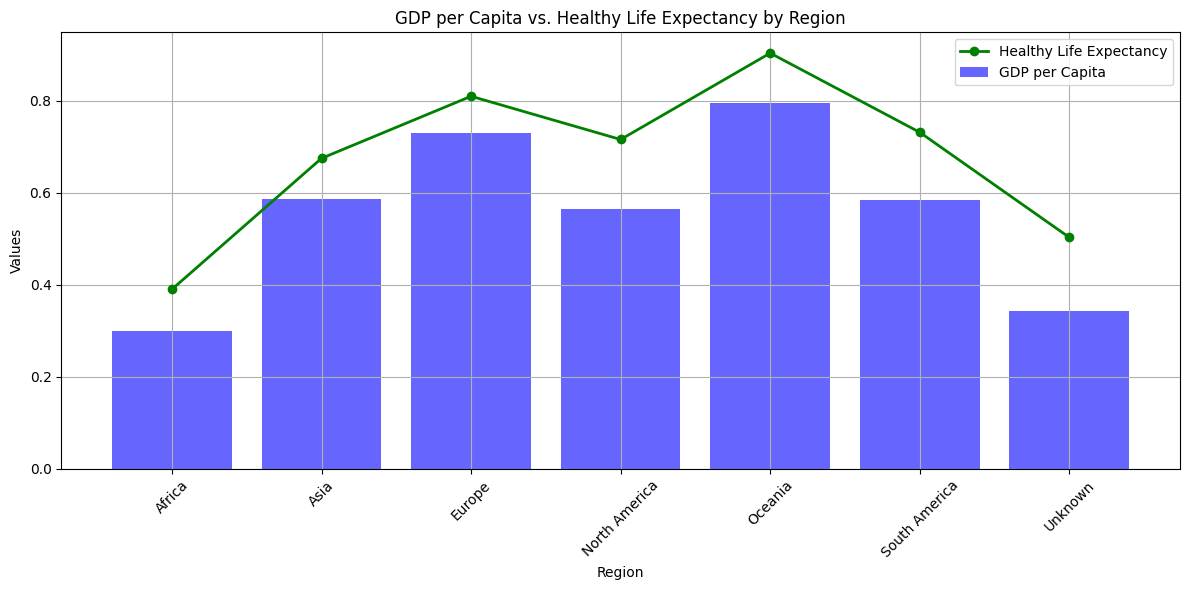

In [98]:
plt.figure(figsize=(12, 6))

plt.bar(grouped['Region'], grouped['GDP per capita'], color='blue', alpha=0.6, label='GDP per Capita')


plt.plot(grouped['Region'], grouped['Healthy life expectancy'], marker='o', color='green', linestyle='-', linewidth=2, label='Healthy Life Expectancy')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Values')
plt.title('GDP per Capita vs. Healthy Life Expectancy by Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()